In [1]:
import numpy as np
import pandas as pd


In [2]:
df= pd.read_csv('infolimpioavanzadoTarget.csv')
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [3]:
df.shape

(7781, 1285)

In [4]:
sdf = df[['date','open', 'high', 'low', 'close']]
sdf

,date,open,high,low,close
0,2022-01-03,17.799999,18.219000,17.500000,17.760000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000
2,2022-01-05,17.580000,17.799999,16.910000,16.950001
3,2022-01-06,16.650000,16.879999,16.139999,16.170000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000
...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001


In [5]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7781 non-null   object 
 1   open    7781 non-null   float64
 2   high    7781 non-null   float64
 3   low     7781 non-null   float64
 4   close   7781 non-null   float64
dtypes: float64(4), object(1)
memory usage: 304.1+ KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
'''plt.figure(figsize=(20,20)) 
sns.heatmap(sdf.corr(), annot=True)
'''

'plt.figure(figsize=(20,20)) \nsns.heatmap(sdf.corr(), annot=True)\n'

In [8]:
sdf["tomorrow"]= sdf["close"].shift(-1)
sdf

C:\Users\HP\AppData\Local\Temp\ipykernel_28640\3935413076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf["tomorrow"]= sdf["close"].shift(-1)


,date,open,high,low,close,tomorrow
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000
...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,23.350000
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,23.610001
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.610001


## setting boolean values

In [9]:
sdf["target"] = sdf["tomorrow"] > sdf["close"].astype(float)
sdf

C:\Users\HP\AppData\Local\Temp\ipykernel_28640\2232110051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf["target"] = sdf["tomorrow"] > sdf["close"].astype(float)


,date,open,high,low,close,tomorrow,target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000,False
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001,False
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000,False
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000,False
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000,True
...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,23.350000,True
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,23.350000,False
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,23.610001,True
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.610001,False


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
ml = RandomForestClassifier(n_estimators=200, min_samples_split= 100, random_state=1)

In [12]:
train = sdf.iloc[:-100]
test = sdf.iloc[-100:]

In [13]:
pred = ["open", "high", "low", "close"] 
ml.fit(train[pred], train["target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [14]:
from sklearn.metrics import precision_score

In [15]:
p = ml.predict(test[pred])
p

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
cols = sdf.select_dtypes(include=['object'])
cols

,date
0,2022-01-03
1,2022-01-04
2,2022-01-05
3,2022-01-06
4,2022-01-07
...,...
7776,2022-12-23
7777,2022-12-27
7778,2022-12-28
7779,2022-12-29


In [18]:
for i in cols.columns:
    try:
        sdf[i] = le.fit_transform(sdf[i])
    except:
        continue

C:\Users\HP\AppData\Local\Temp\ipykernel_28640\2241738112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf[i] = le.fit_transform(sdf[i])


In [19]:
sdf.corr()

,date,open,high,low,close,tomorrow,target
date,1.000000,-0.033387,-0.033622,-0.032607,-0.032823,-0.031013,0.030005
open,-0.033387,1.000000,0.999876,0.999878,0.999660,0.993796,0.010350
high,-0.033622,0.999876,1.000000,0.999875,0.999862,0.994051,0.010773
low,-0.032607,0.999878,0.999875,1.000000,0.999859,0.993980,0.010333
close,-0.032823,0.999660,0.999862,0.999859,1.000000,0.994115,0.010634
tomorrow,-0.031013,0.993796,0.994051,0.993980,0.994115,1.000000,0.021349
target,0.030005,0.010350,0.010773,0.010333,0.010634,0.021349,1.000000


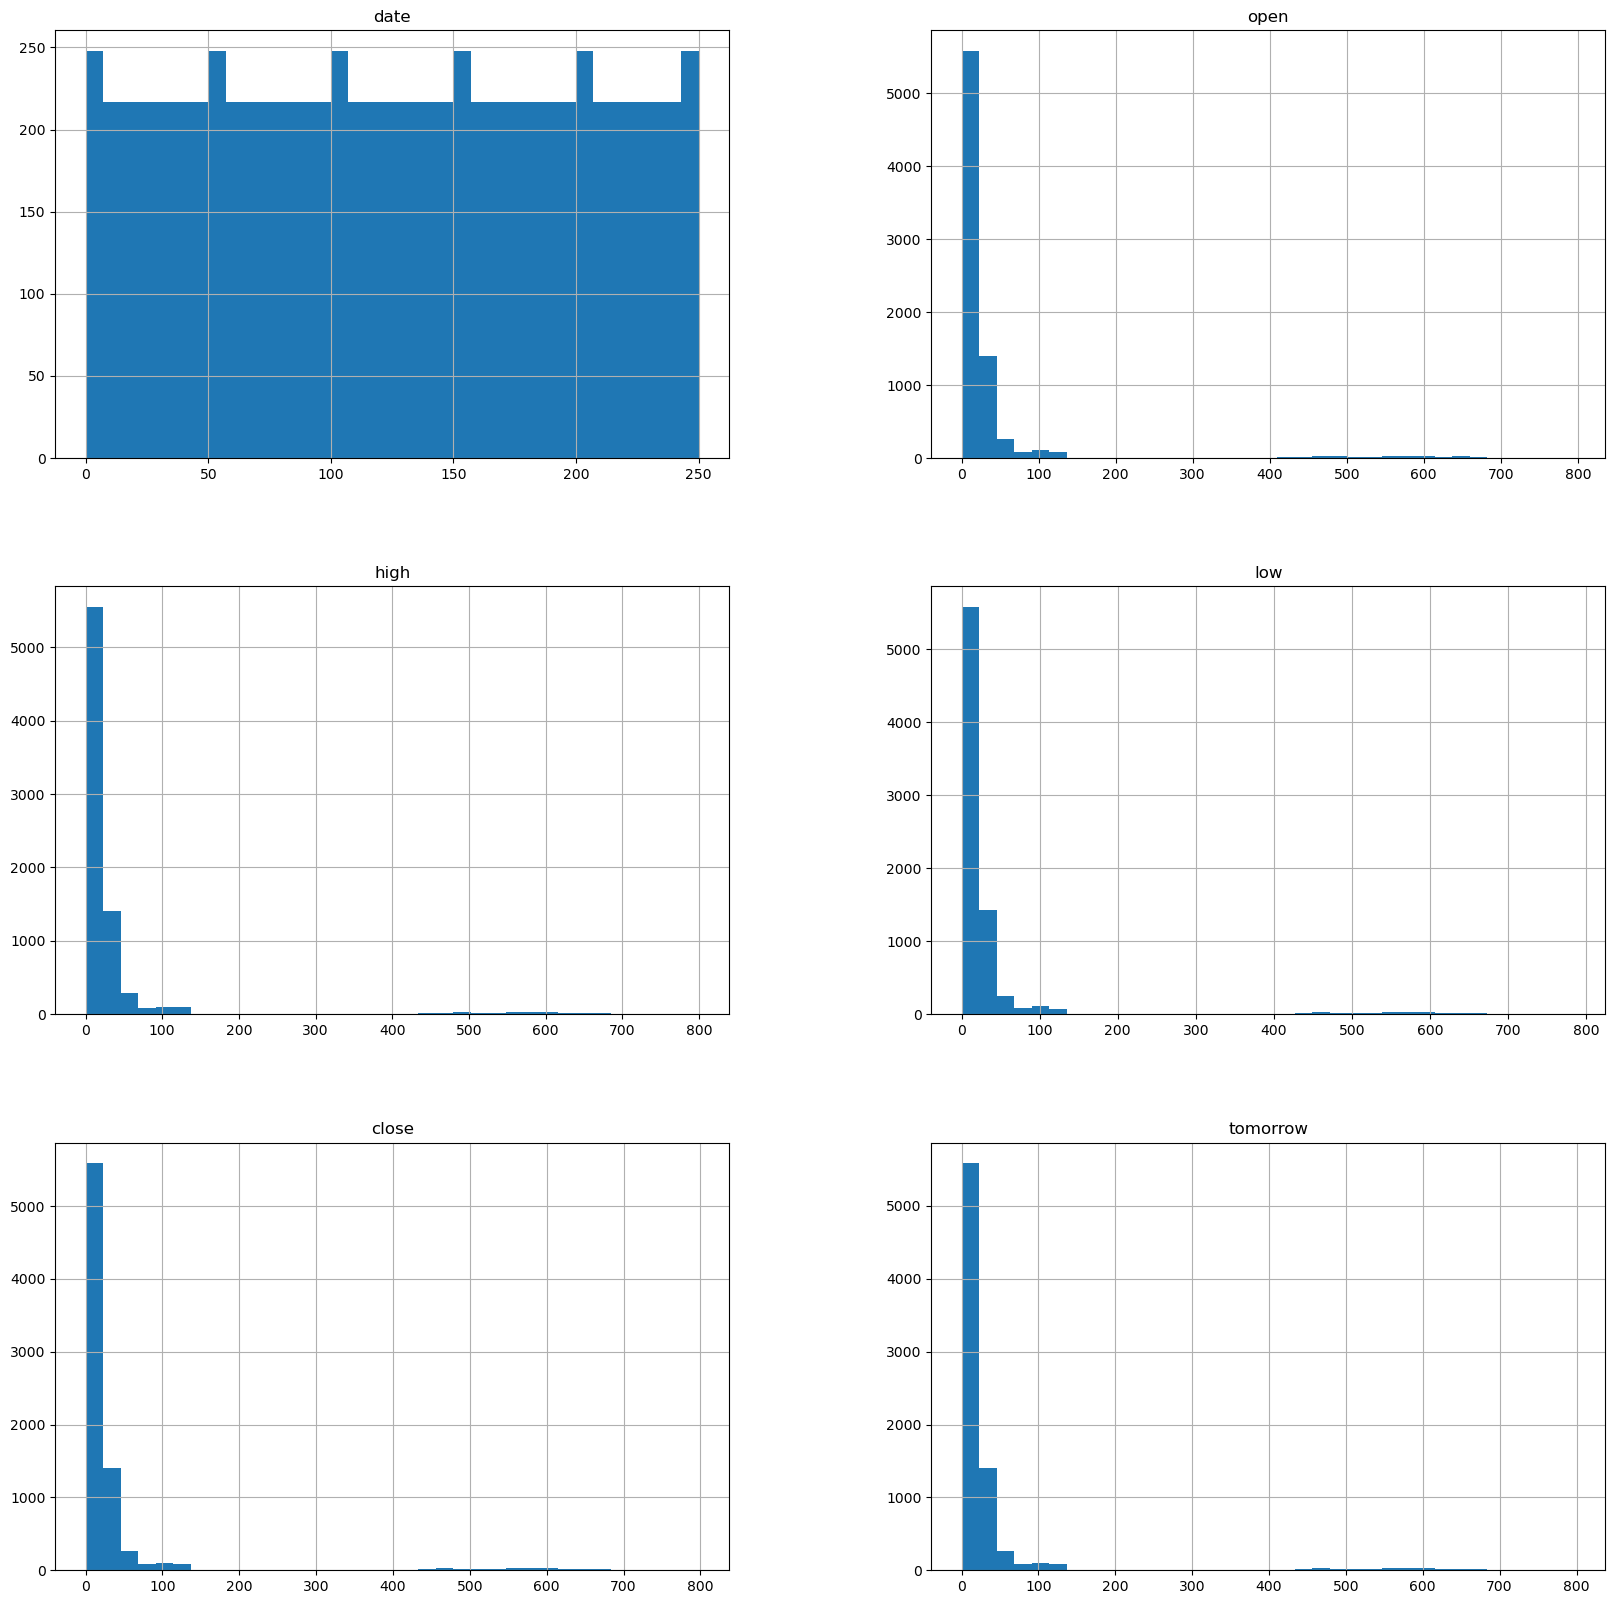

In [20]:
sdf.hist(bins=35,figsize=(20,20));

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
for i in sdf.columns:
    sdf[i] = scaler.fit_transform(sdf[[i]])

C:\Users\HP\AppData\Local\Temp\ipykernel_28640\4007029763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf[i] = scaler.fit_transform(sdf[[i]])
C:\Users\HP\AppData\Local\Temp\ipykernel_28640\4007029763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf[i] = scaler.fit_transform(sdf[[i]])
C:\Users\HP\AppData\Local\Temp\ipykernel_28640\4007029763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


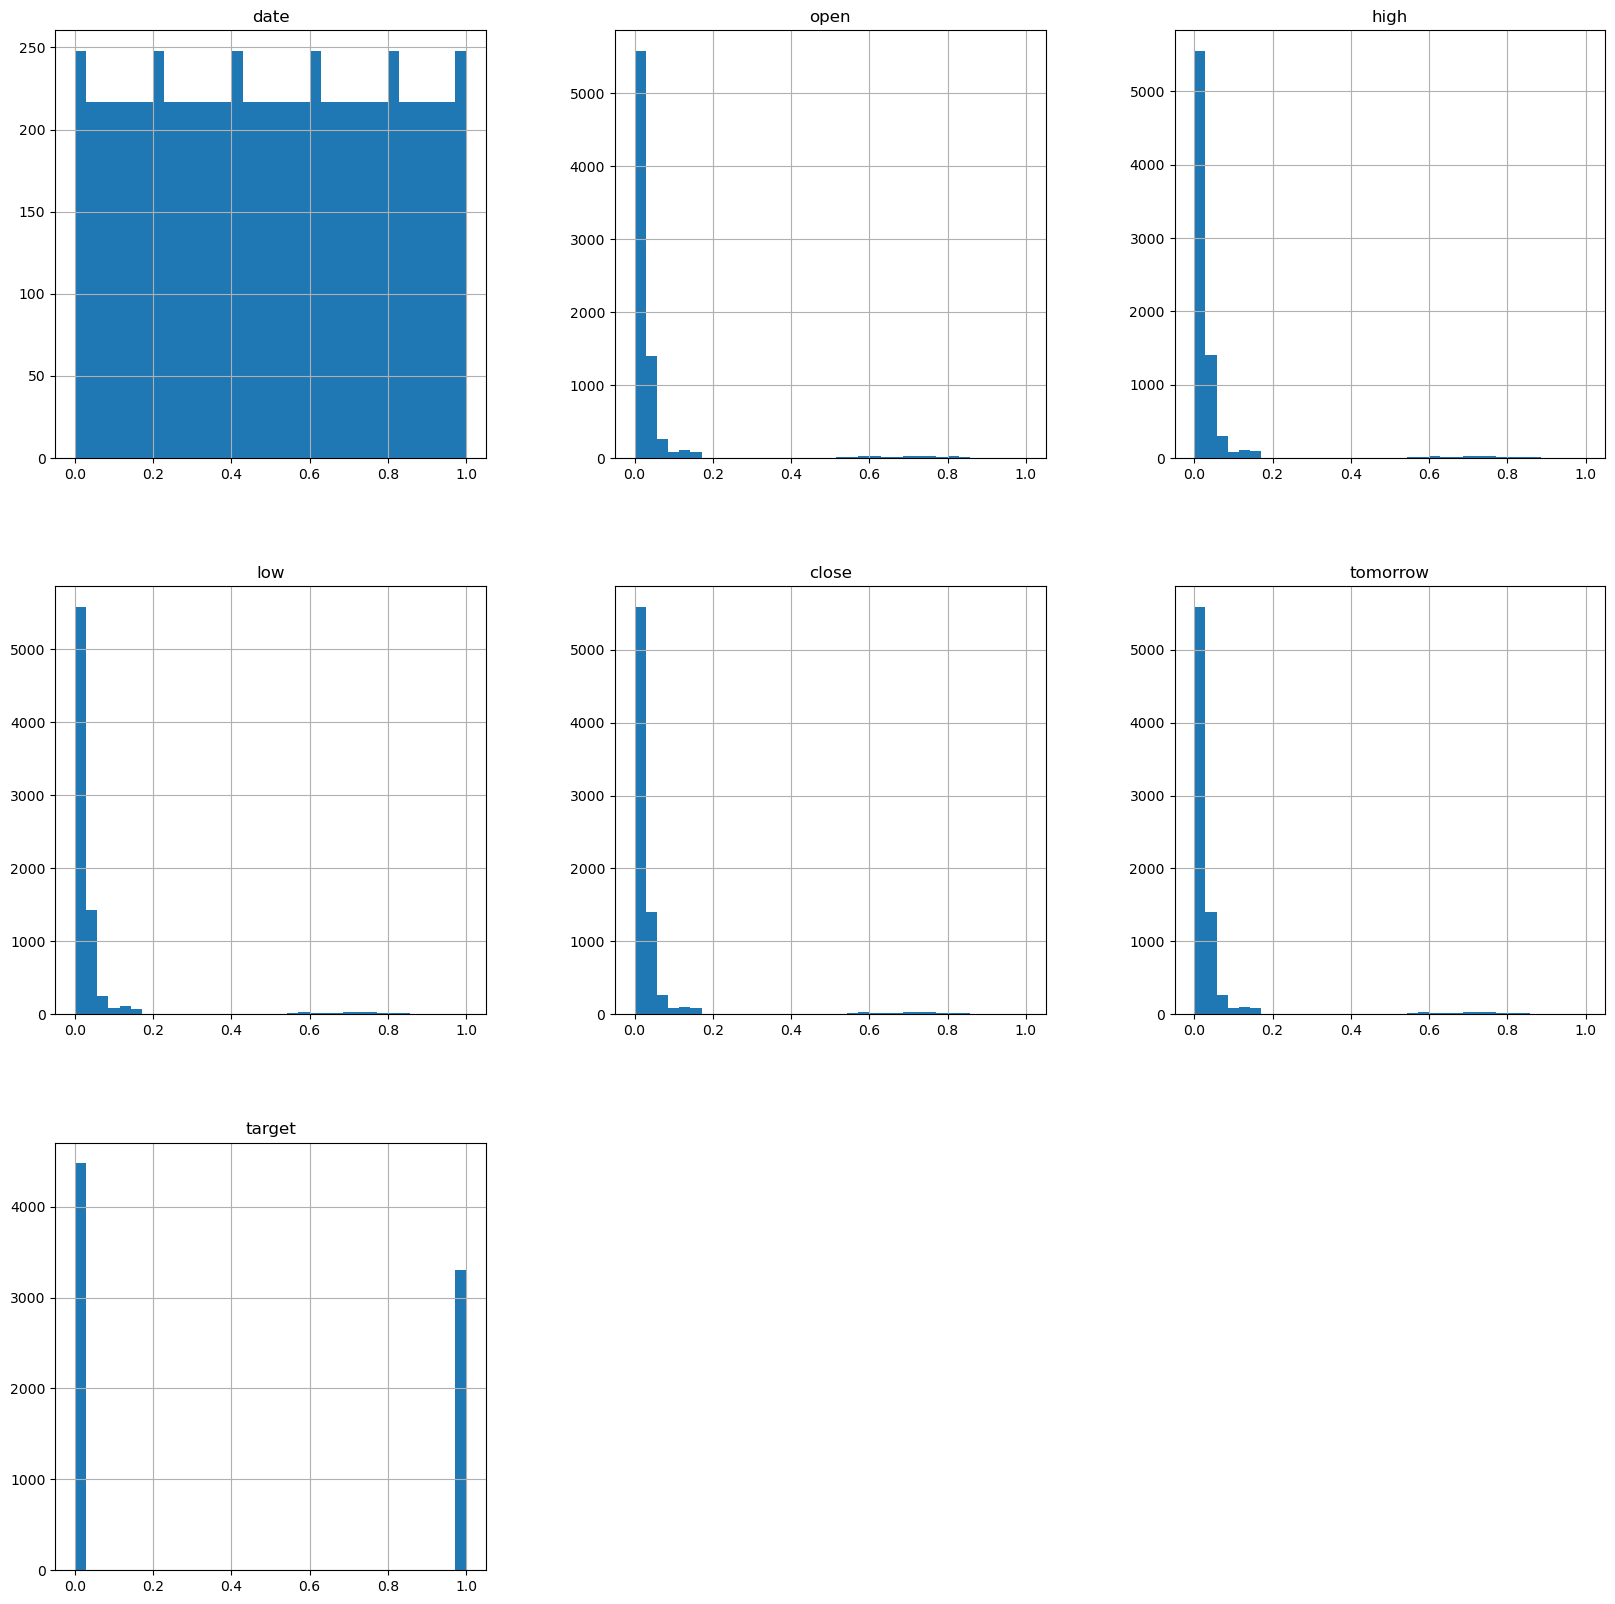

In [23]:
sdf.hist(bins=35,figsize=(20,20));

In [24]:
y=sdf.target

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(sdf,y,test_size=0.28,random_state=42)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
clf = tree.fit(X_train,y_train)
treepredict = clf.predict(X_test)

In [28]:
accuracy_score(treepredict,y_test)

1.0

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [30]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      7781 non-null   float64
 1   open      7781 non-null   float64
 2   high      7781 non-null   float64
 3   low       7781 non-null   float64
 4   close     7781 non-null   float64
 5   tomorrow  7780 non-null   float64
 6   target    7781 non-null   float64
dtypes: float64(7)
memory usage: 425.7 KB


In [31]:
X = sdf.drop('target',axis=1)

In [32]:
sdf = sdf[sdf['tomorrow'].notnull()]

In [33]:
X = sdf.drop('target',axis=1)

In [34]:
v = pca.fit_transform(X)

In [35]:
X_pca = pd.DataFrame(data = v, columns = ['col1', 'col2', 'col3', 'col4'])

In [36]:
X_pca

,col1,col2,col3,col4
0,0.442908,-0.236870,0.000150,0.000060
1,0.439067,-0.235691,-0.000655,0.000067
2,0.434763,-0.235623,-0.000971,-0.000440
3,0.430234,-0.236092,-0.000537,-0.000319
4,0.426141,-0.235514,0.000185,-0.000358
...,...,...,...,...
7775,-0.455829,0.154166,-0.000373,-0.000081
7776,-0.459449,0.155876,-0.000384,-0.000030
7777,-0.463092,0.157534,-0.000451,-0.000062
7778,-0.466723,0.159221,-0.000173,-0.000154


In [37]:
X_pca.corr()

,col1,col2,col3,col4
col1,1.000000e+00,-1.794393e-15,7.223552e-18,2.781803e-18
col2,-1.794393e-15,1.000000e+00,1.501197e-16,1.582565e-17
col3,7.223552e-18,1.501197e-16,1.000000e+00,-1.992609e-16
col4,2.781803e-18,1.582565e-17,-1.992609e-16,1.000000e+00


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
for i in X_pca.columns:
    X_pca[i] = scaler.fit_transform(X_pca[[i]])

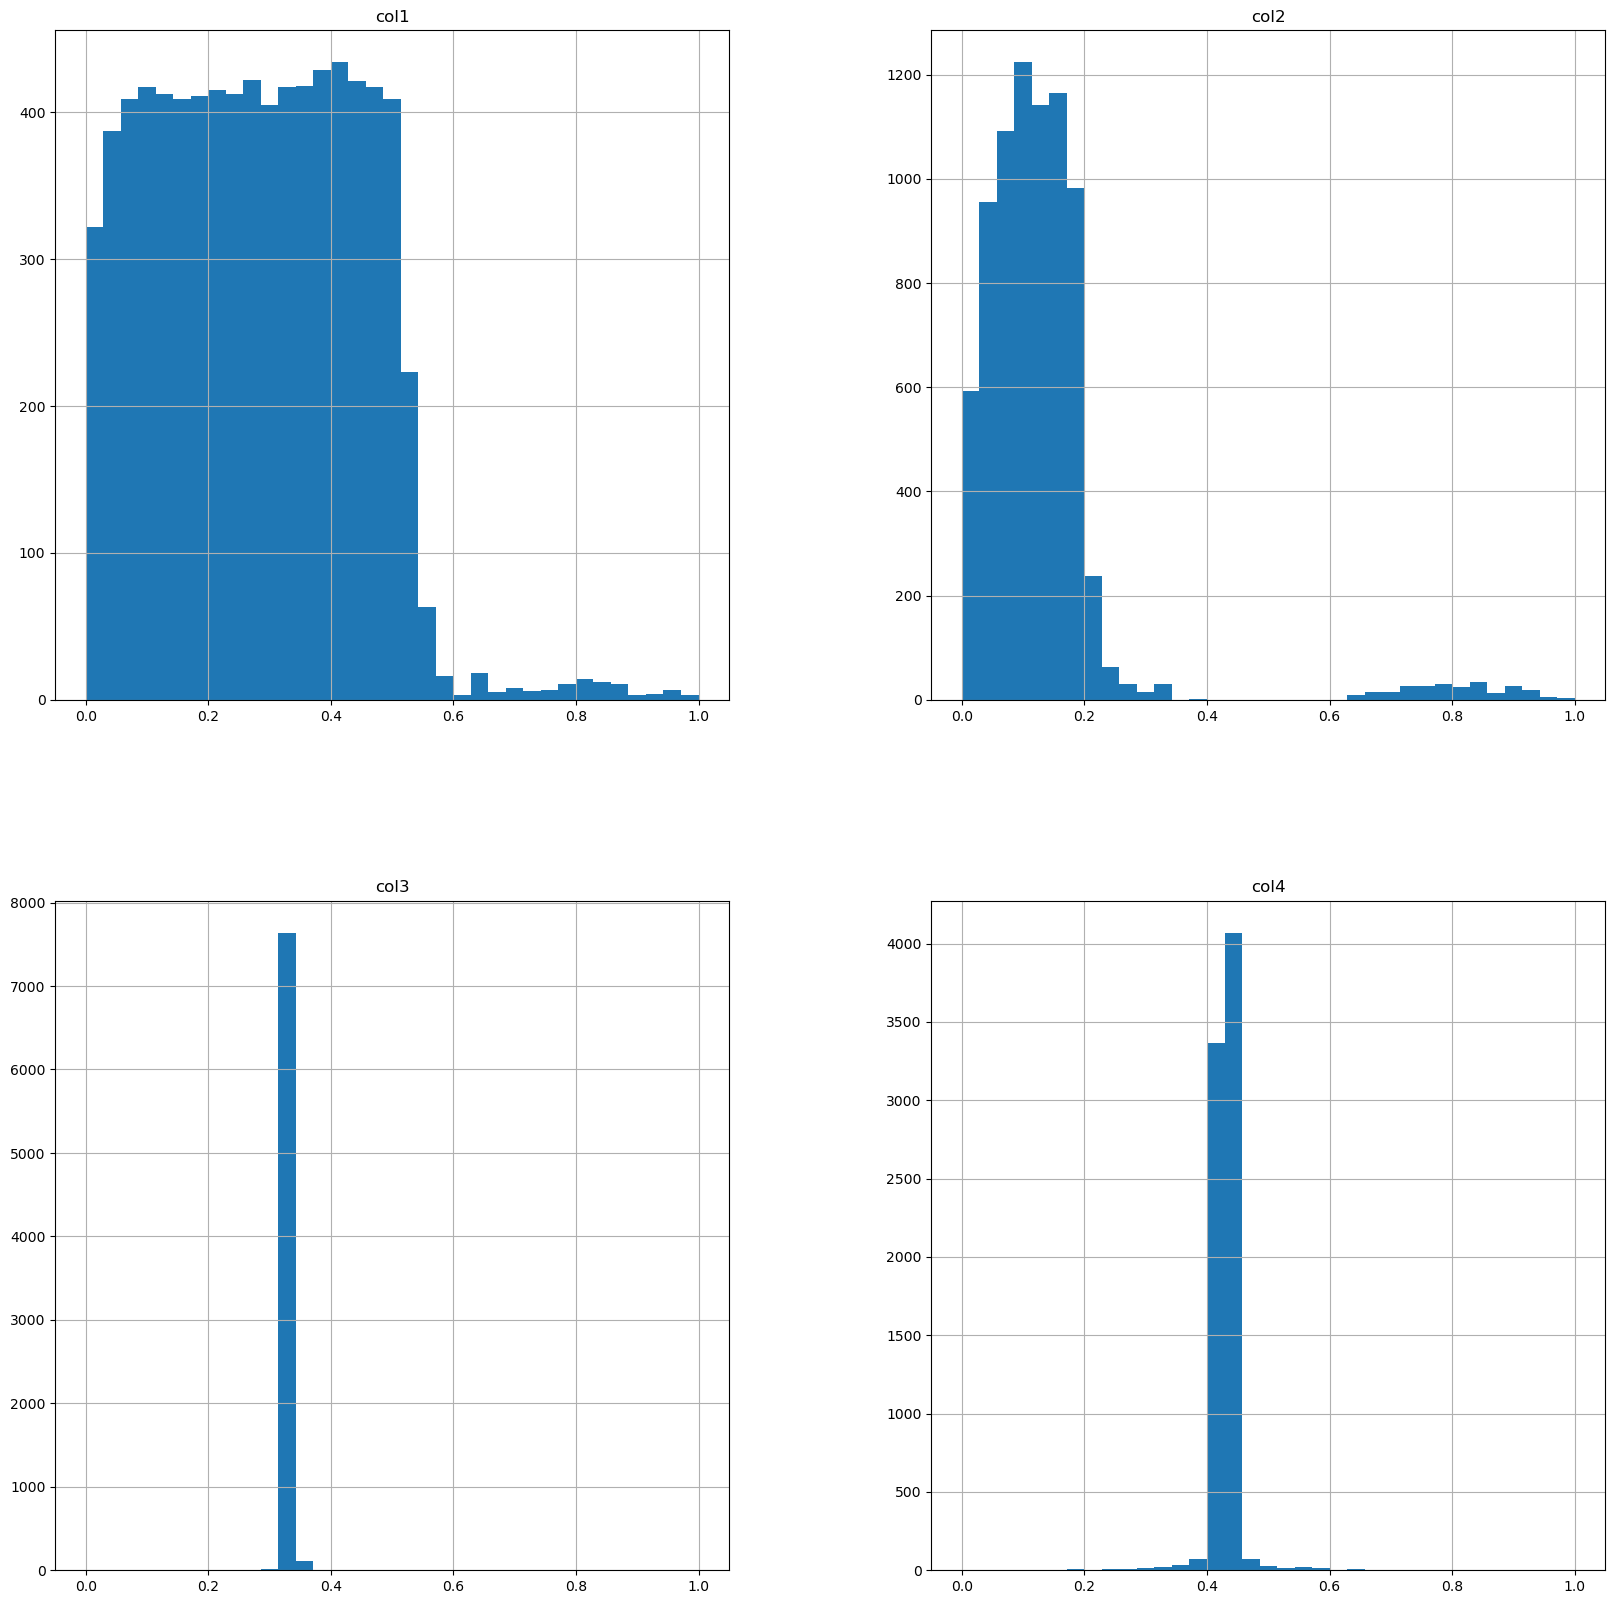

In [40]:
X_pca.hist(bins=35,figsize=(20,20));

In [43]:
y = y.iloc[:-1]

In [44]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7780 entries, 0 to 7779
Series name: target
Non-Null Count  Dtype  
--------------  -----  
7780 non-null   float64
dtypes: float64(1)
memory usage: 60.9 KB


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.28,random_state=42)

In [46]:
from sklearn.metrics import accuracy_score

### Decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
clf = tree.fit(X_train,y_train)
treepredict = clf.predict(X_test)

In [48]:
accuracy_score(treepredict,y_test)

0.76044056906838

### by using Decision tree 76 % accuracy is obtained
